In [1]:
import pandas as pd

dataset_url = "https://raw.githubusercontent.com/nick-kann/Xatu-AI/main/dataset.csv"
df = pd.read_csv(dataset_url)

In [2]:
df = df.sample(n=50000)
df

,id,p1_poke1,p1_poke2,p1_poke3,p1_poke4,p1_poke5,p1_poke6,p2_poke1,p2_poke2,p2_poke3,p2_poke4,p2_poke5,p2_poke6,p1_choice,p2_choice
4075,4076,Iron Treads,Meowscarada,Enamorus,Corviknight,Slowking-Galar,Walking Wake,Clefable,Ogerpon-Wellspring,Dragapult,Great Tusk,Moltres,Hoopa-Unbound,Meowscarada,Clefable
31209,31210,Ribombee,Keldeo-Resolute,Glimmora,Zamazenta,Roaring Moon,Gholdengo,Enamorus,Kingambit,Glimmora,Zamazenta,Roaring Moon,Darkrai,Ribombee,Glimmora
58465,58466,Skeledirge,Great Tusk,Azumarill,Hatterene,Dragonite,Breloom,Clodsire,Weezing-Galar,Iron Crown,Moltres,Zamazenta,Samurott-Hisui,Azumarill,Iron Crown
75594,75595,Clefable,Clodsire,Meowscarada,Kyurem,Dondozo,Rotom-Wash,Scizor,Ogerpon-Wellspring,Cinderace,Iron Valiant,Raging Bolt,Gliscor,Rotom-Wash,Gliscor
2175,2176,Excadrill,Zapdos-Galar,Azumarill,Raikou,Chesnaught,Latios,Torkoal,Lilligant-Hisui,Slither Wing,Dragonite,Ninetales,Walking Wake,Latios,Torkoal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72193,72194,Skeledirge,Great Tusk,Meowscarada,Iron Valiant,Toxapex,Gholdengo,Great Tusk,Kingambit,Iron Valiant,Deoxys-Speed,Raging Bolt,Darkrai,Meowscarada,Darkrai
12099,12100,Clefable,Manaphy,Thundurus-Therian,Iron Valiant,Klefki,Dragonite,Scizor,Iron Valiant,Glimmora,Zamazenta,Raging Bolt,Samurott-Hisui,Klefki,Glimmora
16475,16476,Ogerpon-Wellspring,Iron Moth,Grimmsnarl,Hatterene,Okidogi,Samurott-Hisui,Cinderace,Great Tusk,Ogerpon-Cornerstone,Ribombee,Hatterene,Tornadus-Therian,Okidogi,Hatterene
33875,33876,Gouging Fire,Torkoal,Sandy Shocks,Ceruledge,Hatterene,Walking Wake,Iron Treads,Iron Valiant,Zamazenta,Raging Bolt,Primarina,Roaring Moon,Torkoal,Iron Treads


In [3]:
df.dropna(inplace=True)
print(df.isnull().sum())

id           0
p1_poke1     0
p1_poke2     0
p1_poke3     0
p1_poke4     0
p1_poke5     0
p1_poke6     0
p2_poke1     0
p2_poke2     0
p2_poke3     0
p2_poke4     0
p2_poke5     0
p2_poke6     0
p1_choice    0
p2_choice    0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X = df.drop(['p1_choice', 'p2_choice', 'id'], axis=1)
y = df['p2_choice']
encoder = OneHotEncoder()
le = LabelEncoder()

In [142]:
from lightgbm import LGBMClassifier

X_encoded = encoder.fit_transform(X)

y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

lgb = LGBMClassifier(verbose=-1)
lgb.fit(X_train, y_train)

LGBMClassifier(verbose=-1)

In [143]:
y_pred = lgb.predict(X_test)
predicted_names = le.inverse_transform(y_pred)
actual_names = le.inverse_transform(y_test)
probabilities = lgb.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.048


In [119]:
proby = probabilities.tolist()

In [133]:
for j in range(100):
    for i, p in enumerate(proby[j]):
        if p != 0:
            print(f"{i}: {p}")
            print(f"Label: {le.classes_[i]}")


244: 1.0
Label: Regice
157: 1.0
Label: Kingdra
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
222: 1.0
Label: Pecharunt
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
57: 1.0
Label: Cryogonal
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
271: 1.0
Label: Shaymin
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
222: 1.0
Label: Pecharunt
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
244: 1.0
Label: Regice
271: 1.0
Label: Shaymin
242: 1.0
Label: Raikou
244: 1.0
Label: Regice
182: 1.0
Label: Mamoswine
244: 1.0
Label: Regi

In [121]:
Xwhat = encoder.inverse_transform(X_test.toarray())
for i in range(10):
    print(Xwhat[i])

['Maushold-Four' 'Ninetales-Alola' 'Ursaluna' 'Garganacl' 'Slowking-Galar'
 'Roaring Moon' 'Iron Treads' 'Barraskewda' 'Kingambit' 'Hatterene'
 'Tornadus-Therian' 'Pelipper']
['Enamorus' 'Great Tusk' 'Chansey' 'Toxapex' 'Moltres' 'Hydrapple'
 'Ogerpon-Wellspring' 'Enamorus' 'Ting-Lu' 'Ribombee' 'Raging Bolt'
 'Gholdengo']
['Ogerpon-Wellspring' 'Iron Moth' 'Great Tusk' 'Ting-Lu' 'Dragonite'
 'Gholdengo' 'Ogerpon-Wellspring' 'Landorus-Therian' 'Iron Crown'
 'Glimmora' 'Zamazenta' 'Roaring Moon']
['Maushold-Four' 'Ceruledge' 'Dondozo' 'Dudunsparce-*' 'Tinkaton' 'Ditto'
 'Cinderace' 'Great Tusk' 'Torkoal' 'Tinkaton' 'Mandibuzz' 'Walking Wake']
['Dragapult' 'Ting-Lu' 'Iron Crown' 'Iron Valiant' 'Zamazenta'
 'Corviknight' 'Barraskewda' 'Keldeo-Resolute' 'Raging Bolt'
 'Tornadus-Therian' 'Corviknight' 'Pelipper']
['Meowscarada' 'Ting-Lu' 'Goodra-Hisui' 'Moltres' 'Hatterene' 'Volcarona'
 'Iron Treads' 'Gouging Fire' 'Ninetales-Alola' 'Iron Boulder'
 'Moltres-Galar' 'Primarina']
['Enamorus' 'Gr

In [122]:
for i in range(10):
    print(actual_names[i] + " - " + predicted_names[i])

Pelipper - Roaring Moon
Ribombee - Kyurem
Ogerpon-Wellspring - Roaring Moon
Great Tusk - Roaring Moon
Pelipper - Roaring Moon
Iron Treads - Roaring Moon
Garganacl - Roaring Moon
Ogerpon-Wellspring - Roaring Moon
Ogerpon-Wellspring - Roaring Moon
Ribombee - Roaring Moon


In [125]:
print(str(np.count_nonzero(predicted_names == "Roaring Moon")) + " / " + str(len(predicted_names)))

7607 / 9993


In [73]:
from sklearn.neighbors import KNeighborsClassifier

X_encoded = encoder.fit_transform(X)
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=35)
# cv_scores = cross_val_score(knn, X_encoded, y_encoded, cv=5, scoring='accuracy')
# print(np.mean(cv_scores))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy:.3f}")

Accuracy: 0.376


In [74]:
Xwhat = encoder.inverse_transform(X_test.toarray())
for i in range(10):
    print(Xwhat[i])

['Maushold-Four' 'Ninetales-Alola' 'Ursaluna' 'Garganacl' 'Slowking-Galar'
 'Roaring Moon' 'Iron Treads' 'Barraskewda' 'Kingambit' 'Hatterene'
 'Tornadus-Therian' 'Pelipper']
['Enamorus' 'Great Tusk' 'Chansey' 'Toxapex' 'Moltres' 'Hydrapple'
 'Ogerpon-Wellspring' 'Enamorus' 'Ting-Lu' 'Ribombee' 'Raging Bolt'
 'Gholdengo']
['Ogerpon-Wellspring' 'Iron Moth' 'Great Tusk' 'Ting-Lu' 'Dragonite'
 'Gholdengo' 'Ogerpon-Wellspring' 'Landorus-Therian' 'Iron Crown'
 'Glimmora' 'Zamazenta' 'Roaring Moon']
['Maushold-Four' 'Ceruledge' 'Dondozo' 'Dudunsparce-*' 'Tinkaton' 'Ditto'
 'Cinderace' 'Great Tusk' 'Torkoal' 'Tinkaton' 'Mandibuzz' 'Walking Wake']
['Dragapult' 'Ting-Lu' 'Iron Crown' 'Iron Valiant' 'Zamazenta'
 'Corviknight' 'Barraskewda' 'Keldeo-Resolute' 'Raging Bolt'
 'Tornadus-Therian' 'Corviknight' 'Pelipper']
['Meowscarada' 'Ting-Lu' 'Goodra-Hisui' 'Moltres' 'Hatterene' 'Volcarona'
 'Iron Treads' 'Gouging Fire' 'Ninetales-Alola' 'Iron Boulder'
 'Moltres-Galar' 'Primarina']
['Enamorus' 'Gr

In [77]:
actual_names = le.inverse_transform(y_test)
predicted_names = le.inverse_transform(y_pred)
for i in range(10):
    print(actual_names[i] + " - " + predicted_names[i])

Pelipper - Pelipper
Ribombee - Ribombee
Ogerpon-Wellspring - Landorus-Therian
Great Tusk - Torkoal
Pelipper - Garchomp
Iron Treads - Glimmora
Garganacl - Garganacl
Ogerpon-Wellspring - Ogerpon-Wellspring
Ogerpon-Wellspring - Iron Treads
Ribombee - Ribombee


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict

k_values = range(1, 51)
knn_accuracy_dict = defaultdict(float)

X_encoded = encoder.fit_transform(X)
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k*2)
    cv_scores = cross_val_score(knn, X_encoded, y_encoded, cv=5, scoring='accuracy')
    knn_accuracy_dict[k*2] = np.mean(cv_scores)
    print(f'k: {k}/50 completed', end='\r')

In [91]:
best_k = sorted(knn_accuracy_dict, key=knn_accuracy_dict.get, reverse=True)[:3]

knn_top_acc = {}
for key in best_k:
    knn_top_acc[key] = round(knn_accuracy_dict[key], 3)

print(knn_top_acc)

{32: 0.384, 33: 0.384, 31: 0.383}


In [96]:
from sklearn.naive_bayes import GaussianNB

X_encoded = encoder.fit_transform(X).toarray()
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {gnb_accuracy:.3f}")

Accuracy: 0.099


In [97]:
from sklearn.naive_bayes import MultinomialNB

X_encoded = encoder.fit_transform(X).toarray()
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

mnb = GaussianNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {mnb_accuracy:.3f}")

Accuracy: 0.099


In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt'],
        'bootstrap': [True],
        'max_leaf_nodes': [None, 10, 20]
    }

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=rf_grid, 
                                   n_iter=10,
                                   cv=5,
                                   n_jobs=-1, 
                                   verbose=1,
                                   random_state=42)

X_encoded = encoder.fit_transform(X).toarray()
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Accuracy: {:.3f}".format(random_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Python(46933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46939) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46940) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(46943) Malloc

Best parameters found:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Accuracy: 0.468


In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

X_encoded = encoder.fit_transform(X).toarray()
y_encoded = le.fit_transform(y)

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f'Using device: {device}')
else:
    device = torch.device("cpu")
    print(f'Using device: {device}')

Using device: mps


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

In [68]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(SimpleNN, self).__init__()
        
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))

        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            x = self.relu(x)
        return x


In [73]:
input_size = X_train.shape[1] 
hidden_sizes = [128, 256, 128]
output_size = len(set(y_train))
model = SimpleNN(input_size, hidden_sizes, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 1000

In [74]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training loss: {loss.item():.4f}, Validation loss: {val_loss.item():.4f}')

Epoch [100/1000], Training loss: 3.7098, Validation loss: 3.8663
Epoch [200/1000], Training loss: 2.6366, Validation loss: 3.4337
Epoch [300/1000], Training loss: 2.1840, Validation loss: 3.8954
Epoch [400/1000], Training loss: 1.9810, Validation loss: 4.6083
Epoch [500/1000], Training loss: 1.9261, Validation loss: 5.2210
Epoch [600/1000], Training loss: 1.9133, Validation loss: 5.6345
Epoch [700/1000], Training loss: 1.9092, Validation loss: 5.9323
Epoch [800/1000], Training loss: 1.9075, Validation loss: 6.1639
Epoch [900/1000], Training loss: 1.9067, Validation loss: 6.3362
Epoch [1000/1000], Training loss: 1.9062, Validation loss: 6.4846


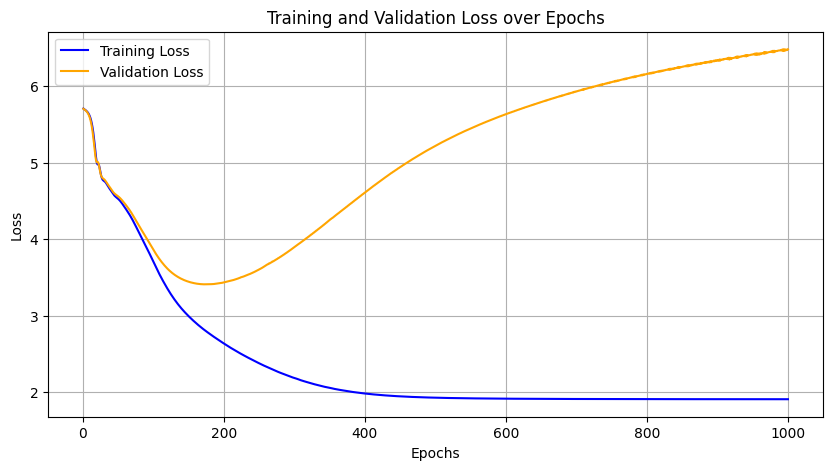

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [71]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1) 
    accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())
    print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.378


In [38]:
predicted_names = le.inverse_transform(predicted.cpu().numpy()) 
actual_names = le.inverse_transform(y_test_tensor.cpu().numpy())
team_names = encoder.inverse_transform(X_test)
n = 10

for i in range(n):
    print(f"Predicted: {predicted_names[i]}, Actual: {actual_names[i]}")
    print(f"Team Pokemon: {team_names[i]}\n")

Predicted: Dragapult, Actual: Samurott-Hisui
Team Pokemon: ['Keldeo-Resolute' 'Gouging Fire' 'Iron Valiant' 'Deoxys-Speed'
 'Roaring Moon' 'Gholdengo' 'Dragapult' 'Kingambit' 'Tornadus-Therian'
 'Alomomola' 'Slowking-Galar' 'Samurott-Hisui']

Predicted: Gliscor, Actual: Skeledirge
Team Pokemon: ['Great Tusk' 'Glimmora' 'Raging Bolt' 'Dragonite' 'Roaring Moon'
 'Gholdengo' 'Fezandipiti' 'Clodsire' 'Skeledirge' 'Alomomola' 'Dragonite'
 'Gliscor']

Predicted: Regidrago, Actual: Zapdos
Team Pokemon: ['Ogerpon-Wellspring' 'Kingambit' 'Iron Valiant' 'Glimmora' 'Raging Bolt'
 'Dragonite' 'Great Tusk' 'Zapdos' 'Regidrago' 'Heatran' 'Alomomola'
 'Dragonite']

Predicted: Alomomola, Actual: Lokix
Team Pokemon: ['Great Tusk' 'Ting-Lu' 'Iron Valiant' 'Raging Bolt' 'Dragonite'
 'Gholdengo' 'Pecharunt' 'Great Tusk' 'Enamorus' 'Iron Crown' 'Lokix'
 'Alomomola']

Predicted: Ribombee, Actual: Ribombee
Team Pokemon: ['Kingambit' 'Iron Valiant' 'Zamazenta' 'Slowking-Galar' 'Darkrai'
 'Gholdengo' 'Cinderac